In [1]:
import numpy as np
import pandas as pd

**# Load the data**

In [2]:
df = pd.read_csv('/content/placement.csv')

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [7]:
df.shape

(100, 4)

In [8]:
df = df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [12]:
import matplotlib.pyplot as plt


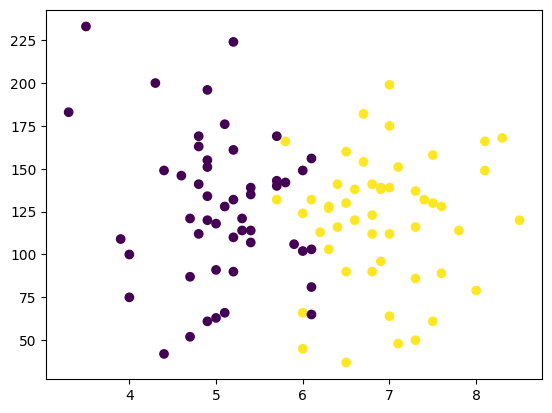

In [14]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [15]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [16]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [19]:
X.shape


(100, 2)

In [20]:
y.shape

(100,)

**# Train-Test-Split**

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [27]:
X_train

,cgpa,iq
28,5.2,90.0
3,7.4,132.0
92,5.2,110.0
63,6.3,128.0
30,7.6,128.0
...,...,...
78,6.1,81.0
27,6.0,124.0
39,4.6,146.0
94,4.7,52.0


In [28]:
X_test

,cgpa,iq
43,6.8,141.0
15,5.1,176.0
20,6.6,120.0
22,4.9,120.0
52,7.0,175.0
88,4.4,149.0
6,5.7,143.0
26,7.0,199.0
77,7.3,50.0
49,5.4,135.0


In [29]:
y_train

,placement
28,0
3,1
92,0
63,1
30,1
...,...
78,0
27,1
39,0
94,0


In [30]:
y_test

,placement
43,1
15,0
20,1
22,0
52,1
88,0
6,0
26,1
77,1
49,0


**Scaling the Values**

In [31]:
from sklearn.preprocessing import StandardScalerX

In [35]:
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_train

array([[-0.68292865, -0.80389629],
       [ 1.22426278,  0.26232405],
       [-0.68292865, -0.29617232],
       [ 0.27066707,  0.16077926],
       [ 1.39764382,  0.16077926],
       [ 0.87750071, -0.24539992],
       [ 0.44404811,  0.97313762],
       [ 1.57102486, -0.19462752],
       [ 1.39764382, -0.82928249],
       [ 2.00447746,  1.17622721],
       [-0.68292865,  0.99852382],
       [-2.15666748,  2.82633012],
       [ 0.27066707, -0.47387571],
       [-1.46314333,  1.98858556],
       [ 0.09728603, -0.47387571],
       [-0.07609501, -0.39771711],
       [-0.50954761,  0.44002744],
       [-0.85630969, -1.48932366],
       [ 0.44404811, -0.80389629],
       [ 0.87750071, -1.46393746],
       [ 0.96419122, -1.87011664],
       [-0.68292865,  2.59785433],
       [ 0.01059551,  0.69388943],
       [-0.16278553,  1.12545481],
       [-1.11638125, -0.01692413],
       [-0.68292865,  0.26232405],
       [ 1.3109533 ,  0.21155166],
       [ 1.13757226, -0.90544109],
       [ 0.09728603,

In [40]:
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [41]:
X_test

array([[  6.8, 141. ],
       [  5.1, 176. ],
       [  6.6, 120. ],
       [  4.9, 120. ],
       [  7. , 175. ],
       [  4.4, 149. ],
       [  5.7, 143. ],
       [  7. , 199. ],
       [  7.3,  50. ],
       [  5.4, 135. ]])

**Loading the model**

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clf = LogisticRegression()

In [45]:
clf.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = clf.predict(X_test)

In [47]:
y_test

,placement
43,1
15,0
20,1
22,0
52,1
88,0
6,0
26,1
77,1
49,0


**Evaluating the Model**

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test, y_pred)

0.5

**Plotting**

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

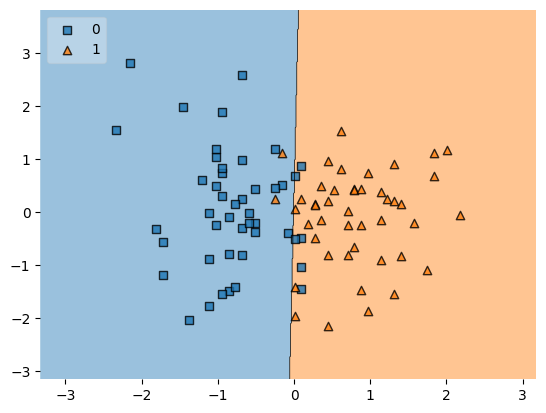

In [51]:
plot_decision_regions(X_train, y_train.values, clf = clf, legend = 2)

**Save the model**

In [52]:
import pickle

In [53]:
pickle.dump(clf, open('model.pkl', 'wb'))